# Sparkify Dashboard
This notebook is used to do some investigation on data

- [Prepare the database](#Prepare-the-database)
- [Query the database](#Query-the-database)
- [Songplay per hours](#Songplay-per-hours)
- [Top 10 songplay users](#Top-10-songplay-users)
- [Top 10 songplay by location](#Top-10-songplay-by-location)

In [2]:
#libraries needed by the projects, convential alias are used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import psycopg2
from sql_queries import *

# Prepare the database

In [3]:
%run create_tables.py #prepare the database schema
%run etl.py #launch the ETL pipline

*********** Creating database tables.....
*********** Dropping tables.....
*********** Creating tables   .....
*********** Processing song_data.....
*********** Processing log_data.....
*********** Processing terminated.....


In [4]:
# connect to the database
conn = psycopg2.connect( DSN_SPARKIFY )
cur = conn.cursor()

# Query the database

In [5]:
# get the totoal of songplays
cur.execute('SELECT * FROM songplays')
all_songplays = cur.fetchall()
total_songplays = len(all_songplays)
total_songplays

6820

In [6]:
#query the db
cur.execute(query_count_songplay_by_location.format( tot_songplay = total_songplays ))
songplays_by_location = cur.fetchall()

cur.execute( query_count_user_listen )
count_user_listen = cur.fetchall()

cur.execute(query_songplay_by_hour )
query_songplay_by_hour = cur.fetchall()

# Songplay per hours

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

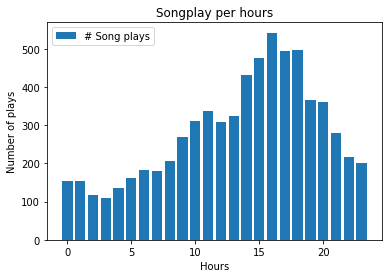

In [7]:
hours = [row[0] for row in query_songplay_by_hour]
tot_by_hours = [row[1] for row in query_songplay_by_hour]

plt.bar( hours, tot_by_hours , label = '# Song plays' )
# the bottom params allow to stack series
plt.legend(loc='upper left')
plt.title('Songplay per hours')
plt.xlabel('Hours')
plt.ylabel('Number of plays')
plt

# Top 10 songplay users

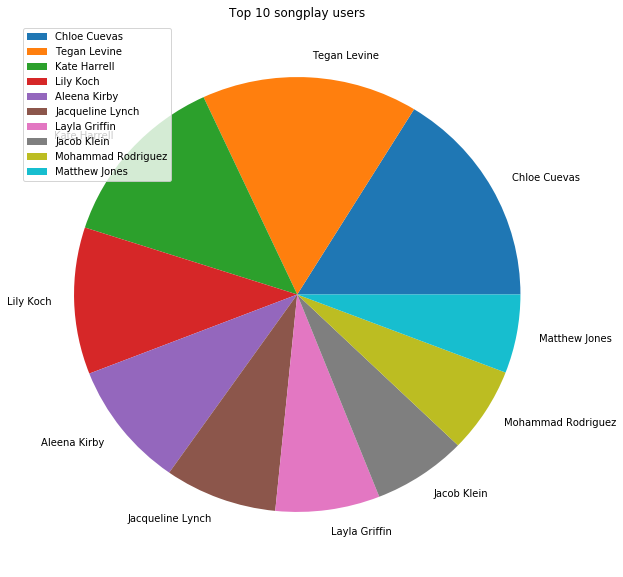

In [8]:
names = [row[1] for row in count_user_listen[:10]]
tot_songplay = [row[2] for row in count_user_listen[:10]]

plt.rcParams['figure.figsize'] = [10,10]

plt.pie(tot_songplay , labels=names)
plt.title('Top 10 songplay users')
plt.legend(loc='upper left')

# Top 10 songplay by location

Text(0.5,1,'Top 10 songplay by location')

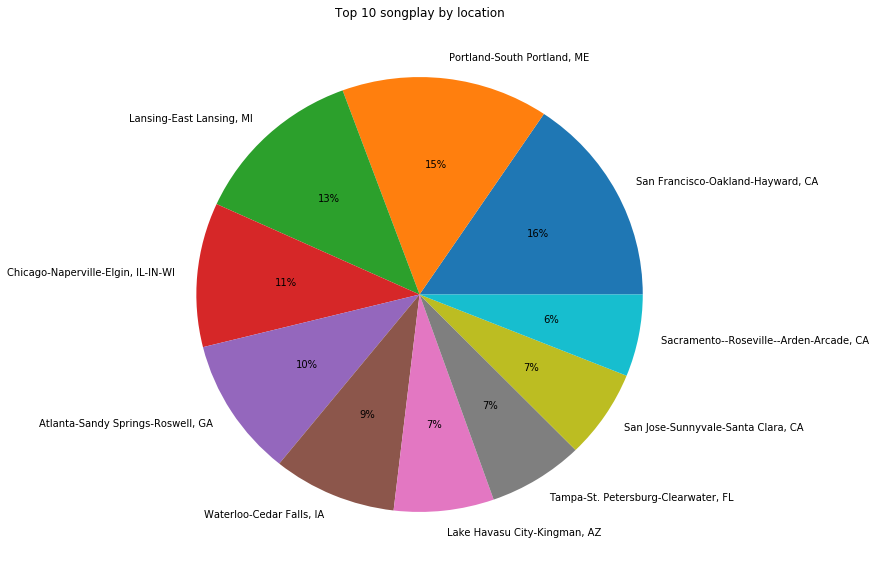

In [9]:
locations = [row[0] for row in songplays_by_location[:10]]
tot_songplay = [row[1] for row in songplays_by_location[:10]]

plt.rcParams['figure.figsize'] = [10,10]

plt.pie(tot_songplay , labels=locations,  autopct='%1.0f%%')
plt.title('Top 10 songplay by location')
#plt.legend(loc='upper right')

In [10]:
conn.close()